In [1]:
import pandas as pd
import numpy as np
# import gurobipy as gp
# from gurobipy import quicksum
# from gurobipy import GRB
import csv
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 200)
# pd.set_option('display.max_rows', 200)

new_cluster = pd.read_csv('cluster_mud_new_features.csv')

In [3]:
hac_cluster = pd.read_csv('datasets/cluster_hac.csv')

In [4]:
hac_cluster.head()

,Unnamed: 0,CENSUS_D,HHFAMINC,URBRUR,TRVLCMIN,dwell_home,dwell_work,dwell_public,VMT_Hr1,VMT_Hr2,VMT_Hr3,VMT_Hr4,VMT_Hr5,VMT_Hr6,VMT_Hr7,VMT_Hr8,VMT_Hr9,VMT_Hr10,VMT_Hr11,VMT_Hr12,VMT_Hr13,VMT_Hr14,VMT_Hr15,VMT_Hr16,VMT_Hr17,VMT_Hr18,VMT_Hr19,VMT_Hr20,VMT_Hr21,VMT_Hr22,VMT_Hr23,VMT_Hr24,location_hr_1,location_hr_2,location_hr_3,location_hr_4,location_hr_5,location_hr_6,location_hr_7,location_hr_8,location_hr_9,location_hr_10,location_hr_11,location_hr_12,location_hr_13,location_hr_14,location_hr_15,location_hr_16,location_hr_17,location_hr_18,location_hr_19,location_hr_20,location_hr_21,location_hr_22,location_hr_23,location_hr_24,cluster_2,cluster_3
0,0,9,30000.0,1,68,855.0,690.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.05,0.000,0.000,0.000,0.000,0.000,5.883,5.898,0.0,0.000,4.864,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,1,1,1,0,0,0,0,0,0,0,2
1,1,3,62500.0,1,120,633.0,0.0,450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,1.926,3.247,3.896,0.000,6.340,0.0,1.226,3.618,0.0,0.0,3.641,0.0,0.0,2.907,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,3,3,2,2,3,2,2,2,0,2
2,2,9,5000.0,1,165,1140.0,0.0,135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,8.312,0.000,0.000,8.202,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,0,3,2,2,3,3,0,0,0,0,0,0,0,0,0,1,1
3,3,9,62500.0,1,50,1281.0,0.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,9.105,0.000,9.054,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,3,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,4,7,87500.0,1,10,1410.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,3.386,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [5]:
final_input = pd.read_csv('datasets/new_charging_availibility_result.csv')

In [6]:
hac_cluster['income_classes'] = final_input['income_classes']

Travel patterns of three income levels

In [7]:
cluster_data = hac_cluster.copy()

In [8]:
cluster_data['income_classes'].value_counts()

1    17105
0     7153
2      575
Name: income_classes, dtype: int64

In [9]:
print('mean of dwell time cluster 1:')
print('at home',cluster_data[cluster_data['income_classes'] == 0]['dwell_home'].mean())
print('at home',cluster_data[cluster_data['income_classes'] == 0]['dwell_home'].std())
print('at workplace',cluster_data[cluster_data['income_classes'] == 0]['dwell_work'].mean())
print('at workplace',cluster_data[cluster_data['income_classes'] == 0]['dwell_work'].std())
print('at publice',cluster_data[cluster_data['income_classes'] == 0]['dwell_public'].mean())
print('at publice',cluster_data[cluster_data['income_classes'] == 0]['dwell_public'].std())
print('mean of dwell time cluster 2:')
print('at home',cluster_data[cluster_data['income_classes'] == 1]['dwell_home'].mean())
print('at home',cluster_data[cluster_data['income_classes'] == 1]['dwell_home'].std())
print('at workplace',cluster_data[cluster_data['income_classes'] == 1]['dwell_work'].mean())
print('at workplace',cluster_data[cluster_data['income_classes'] == 1]['dwell_work'].std())
print('at publice',cluster_data[cluster_data['income_classes'] == 1]['dwell_public'].mean())
print('at publice',cluster_data[cluster_data['income_classes'] == 1]['dwell_public'].std())
print('mean of dwell time cluster 3:')
print('at home',cluster_data[cluster_data['income_classes'] == 2]['dwell_home'].mean())
print('at home',cluster_data[cluster_data['income_classes'] == 2]['dwell_home'].std())
print('at workplace',cluster_data[cluster_data['income_classes'] == 2]['dwell_work'].mean())
print('at workplace',cluster_data[cluster_data['income_classes'] == 2]['dwell_work'].std())
print('at publice',cluster_data[cluster_data['income_classes'] == 2]['dwell_public'].mean())
print('at publice',cluster_data[cluster_data['income_classes'] == 2]['dwell_public'].std())

mean of dwell time cluster 1:
at home 1015.6905074793794
at home 364.7316900975138
at workplace 100.40355095764014
at workplace 223.32890376019358
at publice 159.29179365301275
at publice 261.17318555607335
mean of dwell time cluster 2:
at home 947.4843262204062
at home 371.3313315811573
at workplace 165.8893890675242
at workplace 267.3252969027261
at publice 169.29663840982184
at publice 295.1108654758844
mean of dwell time cluster 3:
at home 904.0580869565217
at home 352.8648087796227
at workplace 213.8591304347826
at workplace 279.62336637010236
at publice 172.62400000000002
at publice 292.42316560998705


In [10]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [11]:
cluster_data.head()

,Unnamed: 0,CENSUS_D,HHFAMINC,URBRUR,TRVLCMIN,dwell_home,dwell_work,dwell_public,VMT_Hr1,VMT_Hr2,VMT_Hr3,VMT_Hr4,VMT_Hr5,VMT_Hr6,VMT_Hr7,VMT_Hr8,VMT_Hr9,VMT_Hr10,VMT_Hr11,VMT_Hr12,VMT_Hr13,VMT_Hr14,VMT_Hr15,VMT_Hr16,VMT_Hr17,VMT_Hr18,VMT_Hr19,VMT_Hr20,VMT_Hr21,VMT_Hr22,VMT_Hr23,VMT_Hr24,location_hr_1,location_hr_2,location_hr_3,location_hr_4,location_hr_5,location_hr_6,location_hr_7,location_hr_8,location_hr_9,location_hr_10,location_hr_11,location_hr_12,location_hr_13,location_hr_14,location_hr_15,location_hr_16,location_hr_17,location_hr_18,location_hr_19,location_hr_20,location_hr_21,location_hr_22,location_hr_23,location_hr_24,cluster_2,cluster_3,income_classes
0,0,9,30000.0,1,68,855.0,690.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.05,0.000,0.000,0.000,0.000,0.000,5.883,5.898,0.0,0.000,4.864,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,1,1,1,0,0,0,0,0,0,0,2,0
1,1,3,62500.0,1,120,633.0,0.0,450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,1.926,3.247,3.896,0.000,6.340,0.0,1.226,3.618,0.0,0.0,3.641,0.0,0.0,2.907,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,3,3,2,2,3,2,2,2,0,2,1
2,2,9,5000.0,1,165,1140.0,0.0,135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,8.312,0.000,0.000,8.202,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,0,3,2,2,3,3,0,0,0,0,0,0,0,0,0,1,1,0
3,3,9,62500.0,1,50,1281.0,0.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,9.105,0.000,9.054,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,3,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
4,4,7,87500.0,1,10,1410.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,3.386,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1


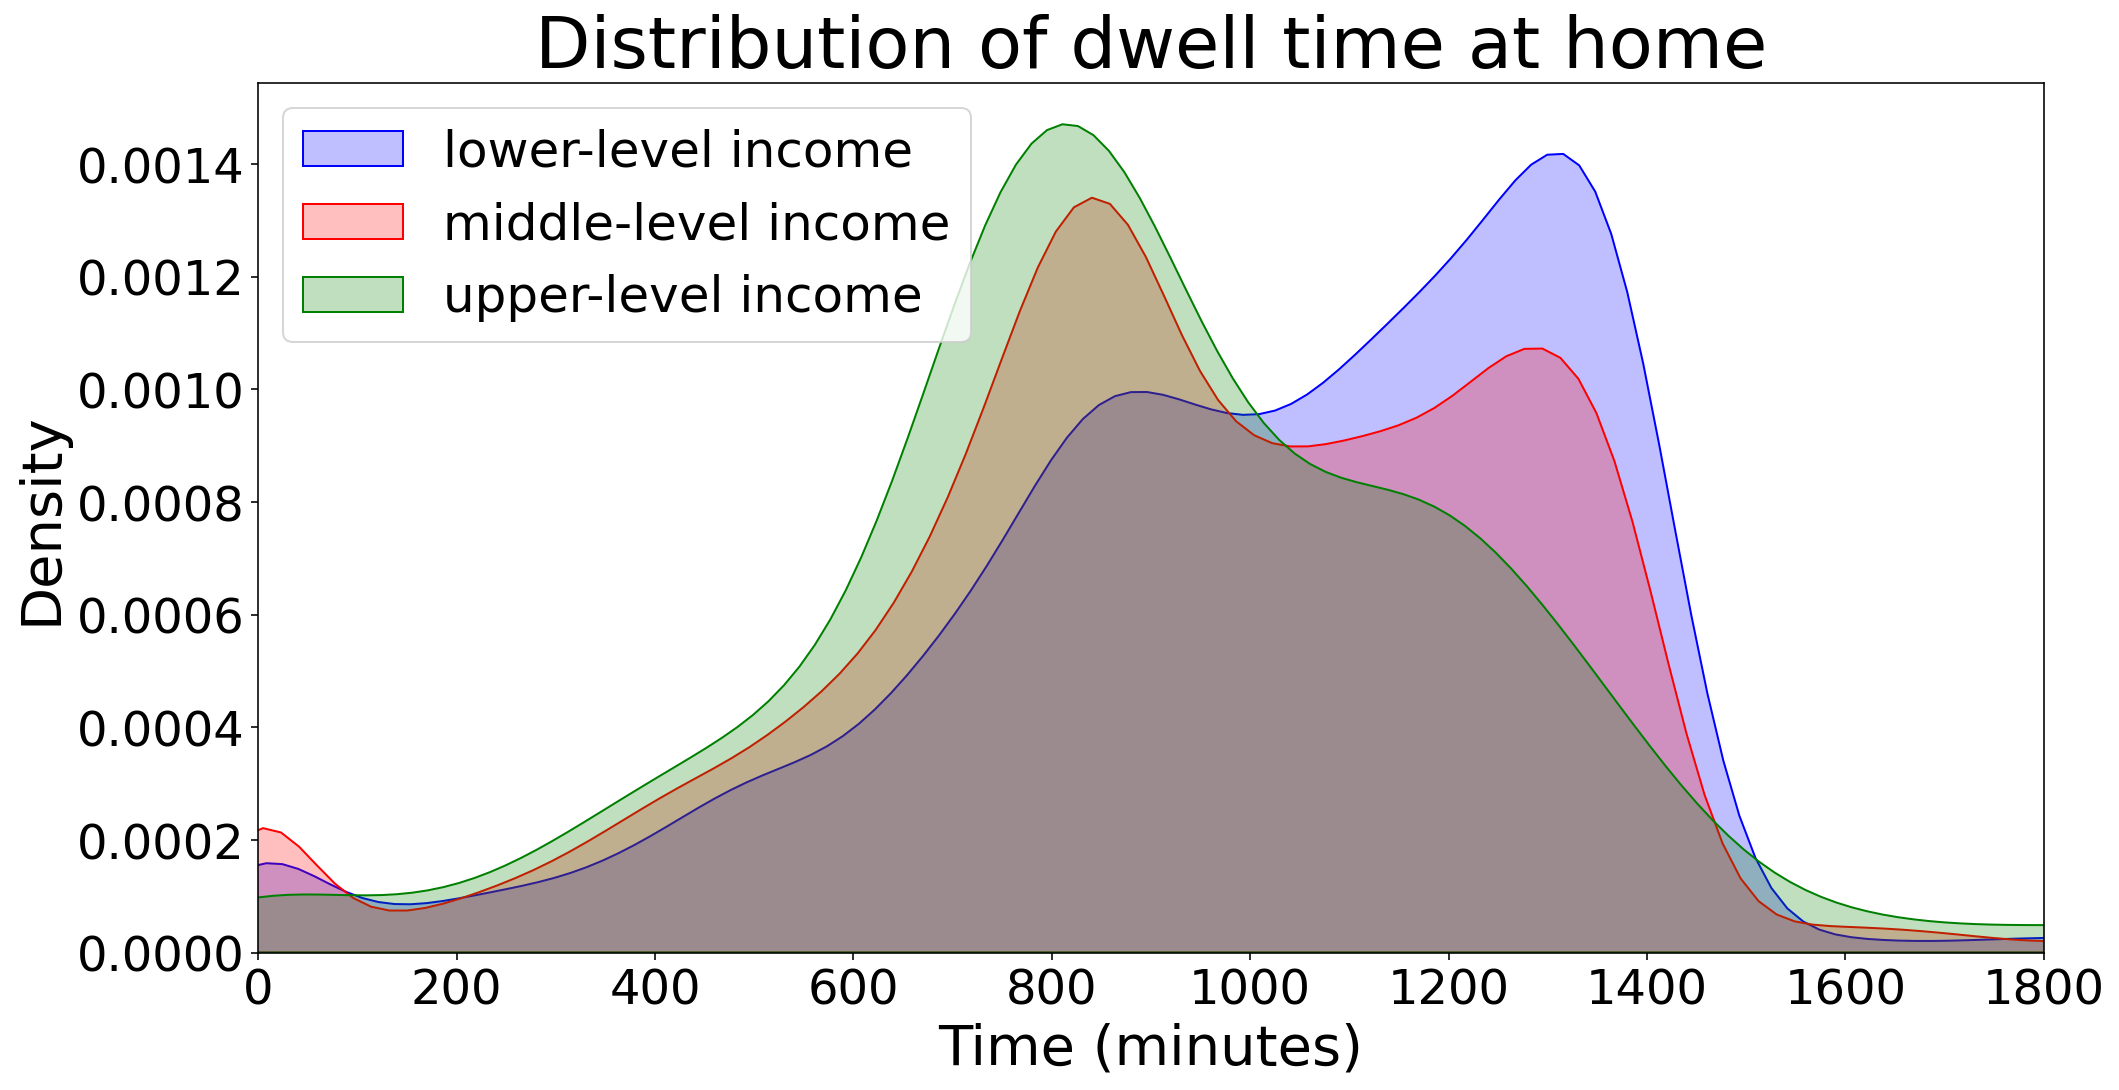

In [12]:
fig = plt.figure(figsize = (16,8))
p1=sns.kdeplot(cluster_data[cluster_data['income_classes'] == 0]['dwell_home'], shade=True, label = 'lower-level income',color = '#0000FF')
p1=sns.kdeplot(cluster_data[cluster_data['income_classes'] == 1]['dwell_home'], shade=True,label = 'middle-level income',color = '#FF0000')
p1=sns.kdeplot(cluster_data[cluster_data['income_classes'] == 2]['dwell_home'], shade=True,label = 'upper-level income',color ='#008000')
# p1=sns.kdeplot(trip_inter_2_nor_3_home, shade=True,label = 'Cluster 4',color ='#000800')
# p1=sns.kdeplot(trip_inter_2_nor_4_home, shade=True, label = 'Cluster 5',color = '#87CEFA')
# p1=sns.kdeplot(trip_inter_2_nor_5_home, shade=True,label = 'Cluster 6',color = '#FFA07A')
# p1=sns.kdeplot(trip_inter_2_nor_6_home, shade=True,label = 'Cluster 7',color ='#7CFC00')
# p1=sns.kdeplot(trip_inter_2_nor_7_home, shade=True,label = 'Cluster 8',color ='#00FC7C')
# p1=sns.kdeplot(dwell_process_other_home*0.6, shade=True,label = 'Home of others',color = '#87CEFA',linestyle="--")
# p1=sns.kdeplot(dwell_process_other_work*0.6, shade=True,label = 'Workplace of others',color ='#FFA07A',linestyle="--")
# p1=sns.kdeplot(dwell_process_other_public*0.6, shade=True, label = 'Public of Others',color = '#7CFC00',linestyle="--")
plt.title('Distribution of dwell time at home', fontsize=36)
plt.xlabel('Time (minutes)',fontsize=28);
plt.ylabel('Density',fontsize=28);
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlim(0, 1800) 
# plt.xticle()
plt.legend(loc='upper left',fontsize=25)
plt.show();

fig.savefig('figures/income_home_CAPITAL.png',dpi=600)

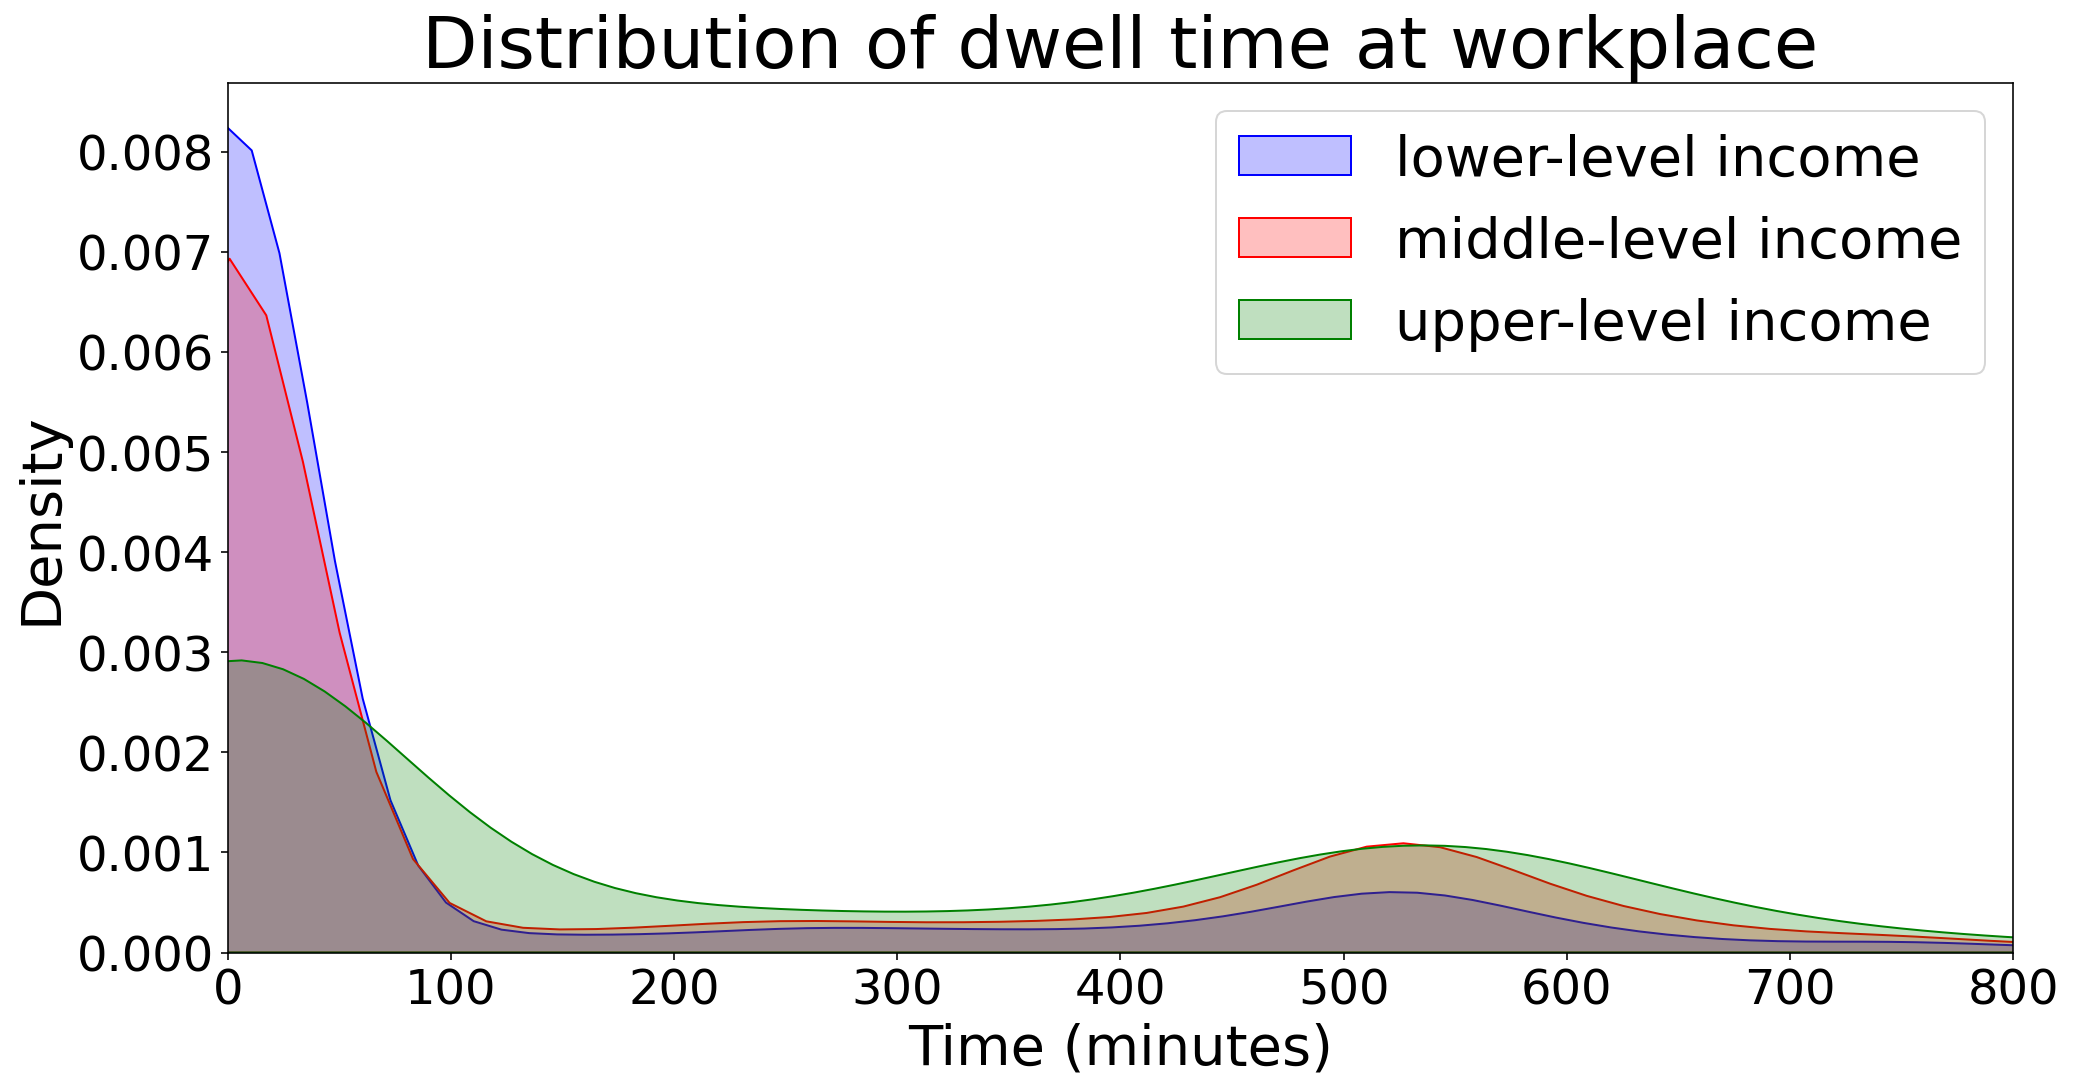

In [13]:
fig = plt.figure(figsize = (16,8))
p1=sns.kdeplot(cluster_data[cluster_data['income_classes'] == 0]['dwell_work'], shade=True, label = 'lower-level income',color = '#0000FF')
p1=sns.kdeplot(cluster_data[cluster_data['income_classes'] == 1]['dwell_work'], shade=True,label = 'middle-level income',color = '#FF0000')
p1=sns.kdeplot(cluster_data[cluster_data['income_classes'] == 2]['dwell_work'], shade=True,label = 'upper-level income',color ='#008000')
# p1=sns.kdeplot(trip_inter_2_nor_3['dwell_work'].astype('float64'), shade=True,label = 'Cluster 4',color ='#000800')
# p1=sns.kdeplot(trip_inter_2_nor_4['dwell_work'].astype('float64'), shade=True, label = 'Cluster 5',color = '#87CEFA')
# p1=sns.kdeplot(trip_inter_2_nor_5['dwell_work'].astype('float64'), shade=True,label = 'Cluster 6',color = '#FFA07A')
# p1=sns.kdeplot(trip_inter_2_nor_6['dwell_work'].astype('float64'), shade=True,label = 'Cluster 7',color ='#7CFC00')
# p1=sns.kdeplot(trip_inter_2_nor_7['dwell_work'].astype('float64'), shade=True,label = 'Cluster 8',color ='#00FC7C')
# p1=sns.kdeplot(trip_inter_2_nor_3['dwell_work'], shade=True,label = 'Cluster 4',color ='#000800')
# p1=sns.kdeplot(dwell_process_other_home*0.6, shade=True,label = 'Home of others',color = '#87CEFA',linestyle="--")
# p1=sns.kdeplot(dwell_process_other_work*0.6, shade=True,label = 'Workplace of others',color ='#FFA07A',linestyle="--")
# p1=sns.kdeplot(dwell_process_other_public*0.6, shade=True, label = 'Public of Others',color = '#7CFC00',linestyle="--")
plt.title('Distribution of dwell time at workplace', fontsize=36)
plt.xlabel('Time (minutes)',fontsize=28);
plt.ylabel('Density',fontsize=28);
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlim(0, 800) 
# plt.xticle()
plt.legend(loc='best',fontsize=28)
plt.show();

fig.savefig('figures/income_work_CAPITAL.png',dpi=600)
                 

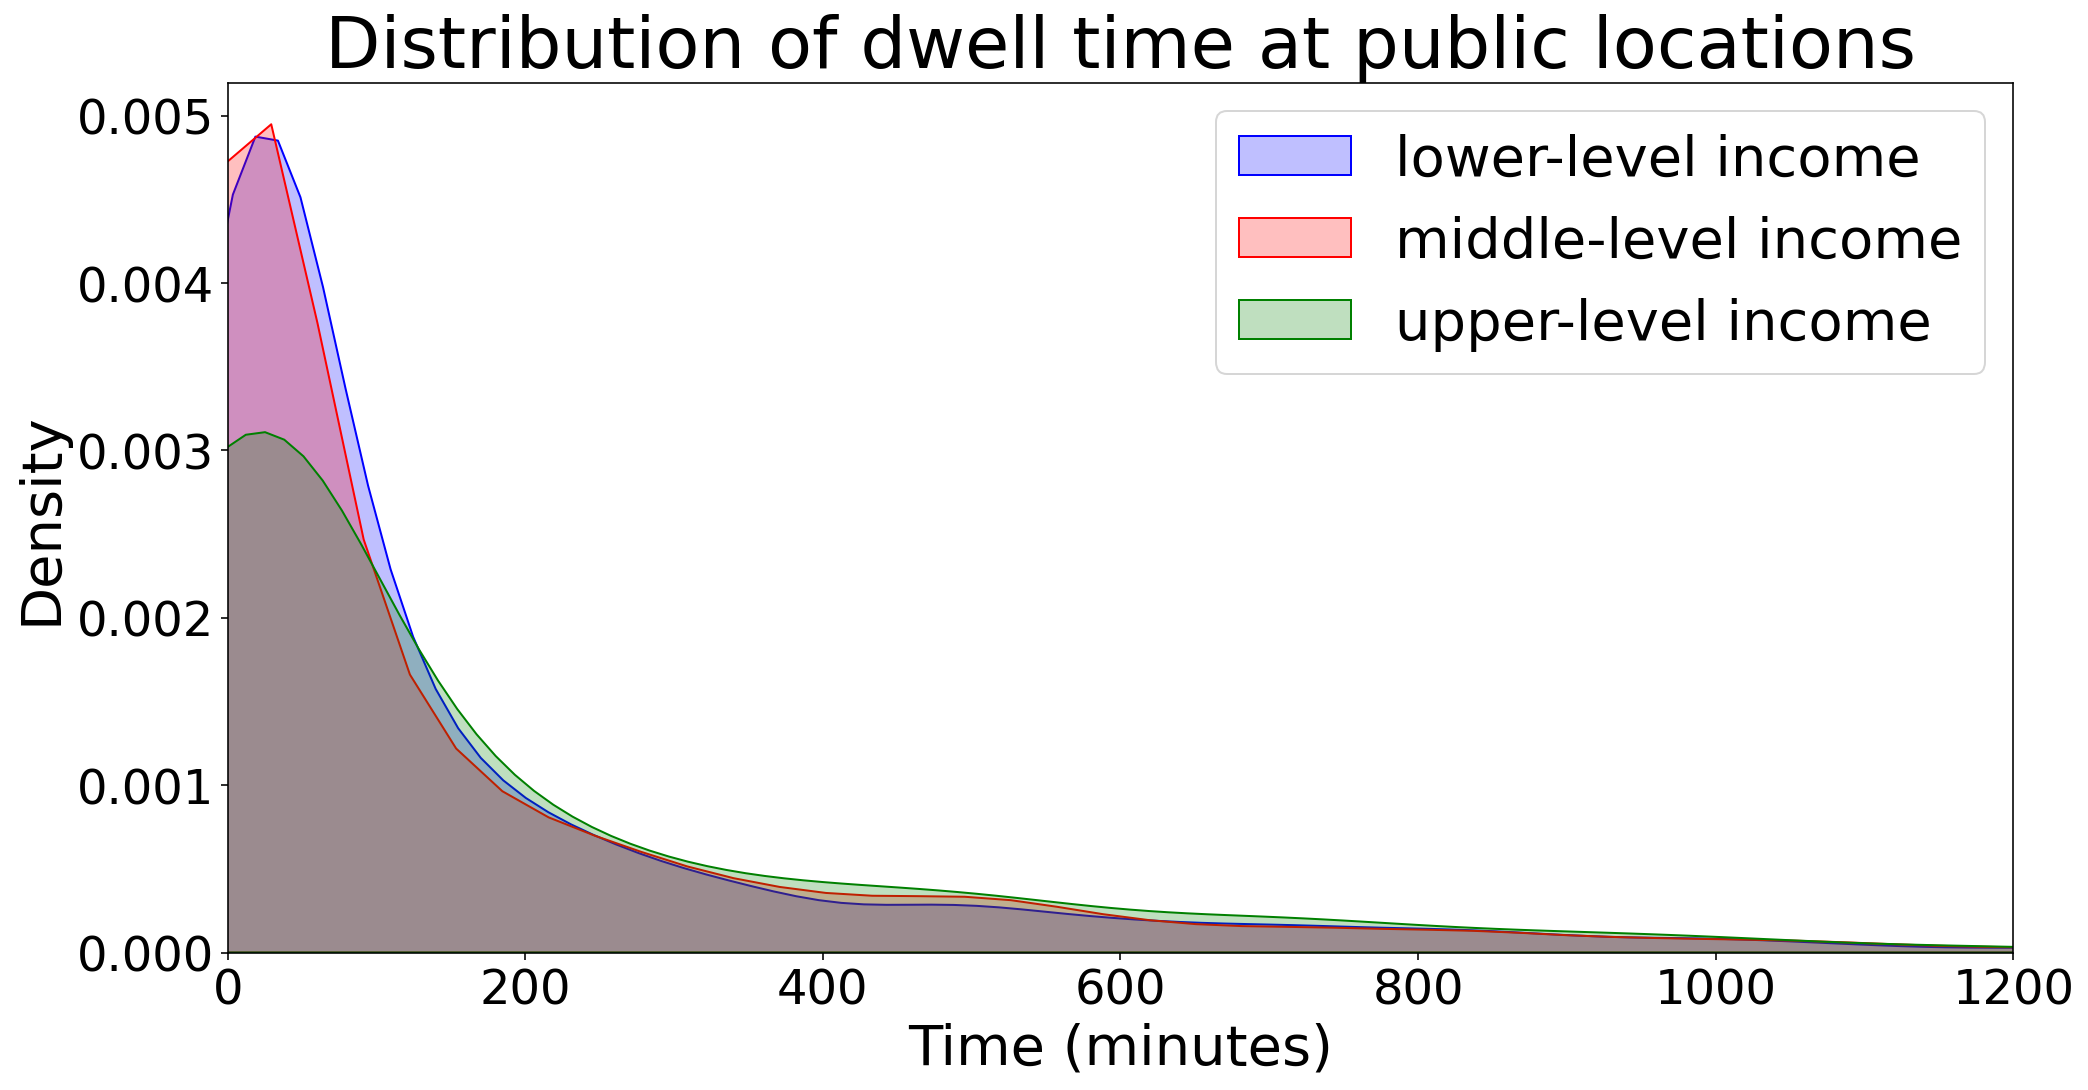

In [14]:
fig = plt.figure(figsize = (16,8))
p1=sns.kdeplot(cluster_data[cluster_data['income_classes'] == 0]['dwell_public'], shade=True, label = 'lower-level income',color = '#0000FF')
p1=sns.kdeplot(cluster_data[cluster_data['income_classes'] == 1]['dwell_public'], shade=True,label = 'middle-level income',color = '#FF0000')
p1=sns.kdeplot(cluster_data[cluster_data['income_classes'] == 2]['dwell_public'], shade=True,label = 'upper-level income',color ='#008000')
# p1=sns.kdeplot(trip_inter_2_nor_3['dwell_public'].astype('float64'), shade=True,label = 'Cluster 4',color ='#000800')
# p1=sns.kdeplot(trip_inter_2_nor_4['dwell_public'].astype('float64'), shade=True, label = 'Cluster 5',color = '#87CEFA')
# p1=sns.kdeplot(trip_inter_2_nor_5['dwell_public'].astype('float64'), shade=True,label = 'Cluster 6',color = '#FFA07A')
# p1=sns.kdeplot(trip_inter_2_nor_6['dwell_public'].astype('float64'), shade=True,label = 'Cluster 7',color ='#7CFC00')
# p1=sns.kdeplot(trip_inter_2_nor_7['dwell_public'].astype('float64'), shade=True,label = 'Cluster 8',color ='#00FC7C')
# p1=sns.kdeplot(trip_inter_2_nor_3['dwell_public'].astype('float64'), shade=True,label = 'Cluster 4',color ='#000800')
# p1=sns.kdeplot(dwell_process_other_home*0.6, shade=True,label = 'Home of others',color = '#87CEFA',linestyle="--")
# p1=sns.kdeplot(dwell_process_other_work*0.6, shade=True,label = 'Workplace of others',color ='#FFA07A',linestyle="--")
# p1=sns.kdeplot(dwell_process_other_public*0.6, shade=True, label = 'Public of Others',color = '#7CFC00',linestyle="--")
plt.title('Distribution of dwell time at public locations', fontsize=36)
plt.xlabel('Time (minutes)',fontsize=28);
plt.ylabel('Density',fontsize=28);
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlim(0, 1200) 
# plt.xticle()
plt.legend(loc='best',fontsize=28)
plt.show();

fig.savefig('figures/income_public_CAPITAL.png',dpi=600)

In [12]:
cluster_data = hac_cluster.copy()

In [13]:
from scipy import stats
tod = []
for i in range(24):
    tod.append(str(i) + ':00 to ' + str(i+1) + ':00')
    
avg_vmt_0 = [0 for i in range(24)]
std_vmt_0 = [0 for i in range(24)]
avg_vmt_1 = [0 for i in range(24)]
std_vmt_1 = [0 for i in range(24)]
avg_vmt_2 = [0 for i in range(24)]
std_vmt_2 = [0 for i in range(24)]

avg_loc_0 = [0 for i in range(24)]
std_loc_0 = [0 for i in range(24)]
avg_loc_1 = [0 for i in range(24)]
std_loc_1 = [0 for i in range(24)]
avg_loc_2 = [0 for i in range(24)]
std_loc_2 = [0 for i in range(24)]

mode_loc_0 = [0 for i in range(24)]
mode_loc_1 = [0 for i in range(24)]
mode_loc_2 = [0 for i in range(24)]

for j in range(24):
        avg_vmt_0[j] = cluster_data[cluster_data['income_classes'] == 0]['VMT_Hr'+str(j+1)].mean()
        std_vmt_0[j] = cluster_data[cluster_data['income_classes'] == 0]['VMT_Hr'+str(j+1)].std()
        avg_vmt_1[j] = cluster_data[cluster_data['income_classes'] == 1]['VMT_Hr'+str(j+1)].mean()
        std_vmt_1[j] = cluster_data[cluster_data['income_classes'] == 1]['VMT_Hr'+str(j+1)].std()
        avg_vmt_2[j] = cluster_data[cluster_data['income_classes'] == 2]['VMT_Hr'+str(j+1)].mean()
        std_vmt_2[j] = cluster_data[cluster_data['income_classes'] == 2]['VMT_Hr'+str(j+1)].std()
        avg_loc_0[j] = cluster_data[cluster_data['income_classes'] == 0]['location_hr_'+str(j+1)].mean()
        std_loc_0[j] = cluster_data[cluster_data['income_classes'] == 0]['location_hr_'+str(j+1)].std()
        avg_loc_1[j] = cluster_data[cluster_data['income_classes'] == 1]['location_hr_'+str(j+1)].mean()
        std_loc_1[j] = cluster_data[cluster_data['income_classes'] == 1]['location_hr_'+str(j+1)].std() 
        avg_loc_2[j] = cluster_data[cluster_data['income_classes'] == 2]['location_hr_'+str(j+1)].mean()
        std_loc_2[j] = cluster_data[cluster_data['income_classes'] == 2]['location_hr_'+str(j+1)].std() 
        
#         mode_loc_0[j] = stats.mode(cluster_data[cluster_data['cluster_3'] == 0]['location_hr_'+str(j+1)])[0][0]
#         mode_loc_1[j] = stats.mode(cluster_data[cluster_data['cluster_3'] == 1]['location_hr_'+str(j+1)])[0][0]
#         mode_loc_2[j] = stats.mode(cluster_data[cluster_data['cluster_3'] == 2]['location_hr_'+str(j+1)])[0][0]
        



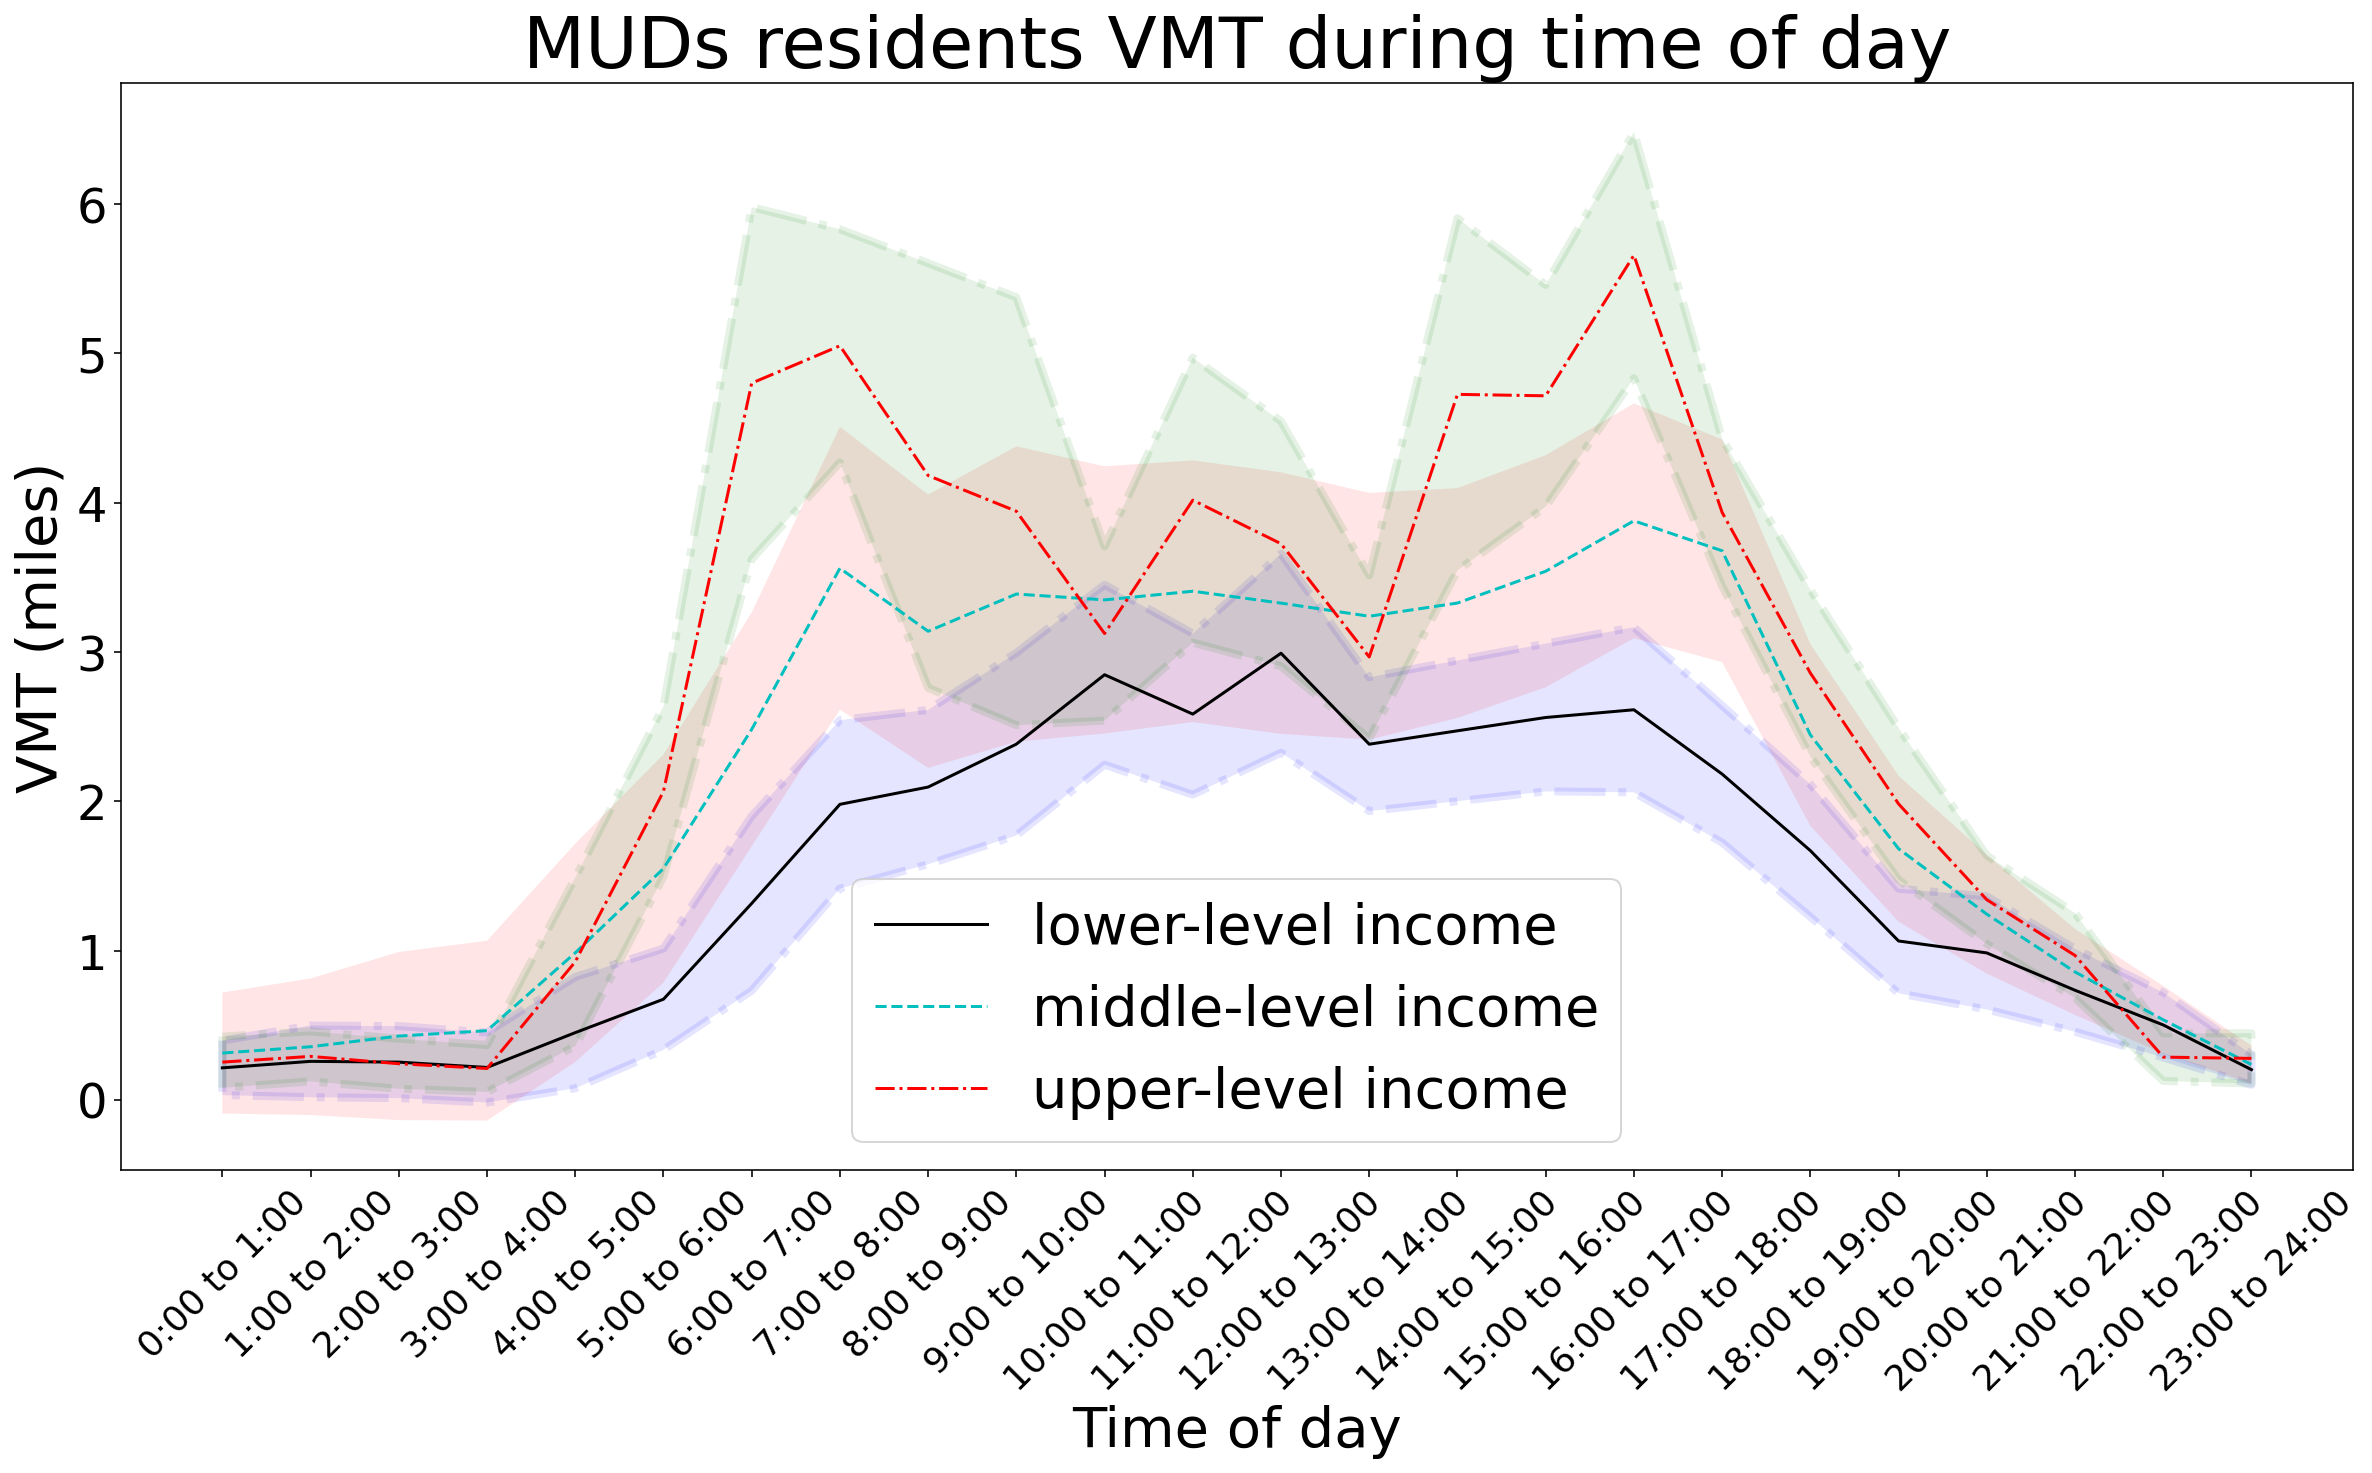

In [17]:
import matplotlib.pyplot as plt
avg_vmt_0 = np.asarray(avg_vmt_0)
std_vmt_0 = np.asarray(std_vmt_0)
avg_vmt_1 = np.asarray(avg_vmt_1)
std_vmt_1 = np.asarray(std_vmt_1)
avg_vmt_2 = np.asarray(avg_vmt_2)
std_vmt_2 = np.asarray(std_vmt_2)
avg_loc_0 = np.asarray(avg_loc_0)
std_loc_0 = np.asarray(std_loc_0)
avg_loc_1 = np.asarray(avg_loc_1)
std_loc_1 = np.asarray(std_loc_1)
avg_loc_2 = np.asarray(avg_loc_2)
std_loc_2 = np.asarray(std_loc_2)

mode_loc_0 = np.asarray(mode_loc_0)
mode_loc_1 = np.asarray(mode_loc_1)
mode_loc_2 = np.asarray(mode_loc_2)


fig = plt.figure(figsize=(20,10))
plt.plot(tod, avg_vmt_0, 'k-', label = 'lower-level income')
plt.plot(tod, avg_vmt_1, 'c--', label = 'middle-level income')
plt.plot(tod, avg_vmt_2, 'r-.', label = 'upper-level income')
# plt.plot(tod, avg_vmt_3, 'm:', label = 'Cluster 4')
plt.fill_between(tod, avg_vmt_0-0.05*std_vmt_0, avg_vmt_0+0.05*std_vmt_0,alpha=0.1, edgecolor='#0000FF', facecolor='#0000FF',
    linewidth=4, linestyle='dashdot', antialiased=True)
plt.fill_between(tod, avg_vmt_1-0.05*std_vmt_1, avg_vmt_1+0.05*std_vmt_1,alpha=0.1, edgecolor='#FF0000', facecolor='#FF0000',
    linewidth=0, linestyle='dashdot', antialiased=True)
plt.fill_between(tod, avg_vmt_2-0.05*std_vmt_2, avg_vmt_2+0.05*std_vmt_2,alpha=0.1, edgecolor='#008000', facecolor='#008000',
    linewidth=4, linestyle='dashdot', antialiased=True)
# plt.fill_between(tod, avg_vmt_3-0.05*std_vmt_3, avg_vmt_3+0.05*std_vmt_3,alpha=0.1, edgecolor='#2F4FCC', facecolor='#7EFF99',
#     linewidth=0)
plt.xticks(rotation=45,fontsize=18)
plt.yticks(fontsize=24)
plt.xlabel('Time of day (hrs)',fontsize=28)
plt.ylabel('VMT (miles)',fontsize=28)
plt.title('MUD residents VMT per time of day',fontsize=36)
plt.legend(loc='best',fontsize=28)

plt.show()
fig.savefig('figures/income_vmt_CAPITAL.png',dpi=600)